# **Convert Resume To Text**

In [2]:
!sudo apt install tesseract-ocr

!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [3]:
print("Loading...")
!apt-get install poppler-utils &> /dev/null
!pip install pdf2image &> /dev/null

Loading...


In [4]:
import pytesseract
import shutil
import os
import random
from pdf2image import convert_from_path
try:
  from PIL import Image
except ImportError:
  import Image


In [5]:
pages = convert_from_path('/content/drive/MyDrive/Kampus Merdeka/Final Project SI-Orbit/classfication text/data/data/ACCOUNTANT/12338274.pdf', 500)
num_pages = 0
#Saving pages in jpeg format
for page in pages:
    page.save('resume_'+str(num_pages)+'.jpg', 'JPEG')
    num_pages += 1

In [6]:
num_pages = 0
extractedInformation = ''
for page in pages:
  image_path_in_colab = ('/content/resume_'+str(num_pages)+'.jpg')
  text = pytesseract.image_to_string(Image.open(image_path_in_colab))
  extractedInformation += text
  num_pages += 1

print(extractedInformation)

ACCOUNTANT
Sumnury
To pursue excellence in the dynamic business world by obtaining a placement allowing me to perform in an environment where honesty, sincerity &
a positive attitude would be valued. I would like to take up a challenging job to nourish my qualification , expertise & experience within a reputed
organization & further enhance my performance. Flexible [Job Title] who adapts seamlessly to constantly evolving accounting processes and
technologies. Flexible [Job Title] who adapts seamlessly to constantly evolving accounting processes and technologies.
Highlights
e Dos , Windows 9.x, XP, MS Office, Oracle, Tally, Adobe Photoshop , Adobe Illustrator, Pagemaker, 3d Inifnative,  ¢ Account
Audio Editing, Video Editing , Macro Media Director, Oracle 81, Developer 2000. reconciliations

Accomplishments
Enter outstanding achievements that show you can go above and beyond basic job expectations. See Examples General Ledger Accounts

e Maintained accurate accounts including cash, inve

# **Classify The Resume**

In [7]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data = pd.read_csv("/content/drive/MyDrive/Kampus Merdeka/Final Project SI-Orbit/classfication text/Resume/Resume.csv")
data

ID  ...  Category
0     16852973  ...        HR
1     22323967  ...        HR
2     33176873  ...        HR
3     27018550  ...        HR
4     17812897  ...        HR
...        ...  ...       ...
2479  99416532  ...  AVIATION
2480  24589765  ...  AVIATION
2481  31605080  ...  AVIATION
2482  21190805  ...  AVIATION
2483  37473139  ...  AVIATION

[2484 rows x 4 columns]

In [9]:
data = data.rename(columns={'Category': 'category', 'Resume_str': 'resume'})

In [10]:
data

ID  ...  category
0     16852973  ...        HR
1     22323967  ...        HR
2     33176873  ...        HR
3     27018550  ...        HR
4     17812897  ...        HR
...        ...  ...       ...
2479  99416532  ...  AVIATION
2480  24589765  ...  AVIATION
2481  31605080  ...  AVIATION
2482  21190805  ...  AVIATION
2483  37473139  ...  AVIATION

[2484 rows x 4 columns]

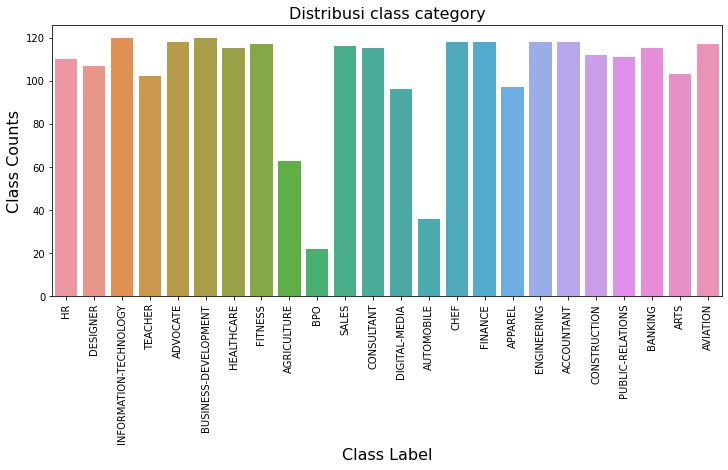

In [11]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(12,5))
sns.countplot(x='category', data=data)
plt.title('Distribusi class category', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

In [12]:
data['category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

X = data['resume'] 
le = LabelEncoder()
le.fit(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'])

print(list(le.classes_))
y = le.transform(data['category'])

#y = tweets.iloc[:, 1].values
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS', 'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT', 'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA', 'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR', 'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']
(2484,)
         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment 

In [14]:
# Membuat empty List
processed_category = []

for resume in range(0, len(X)):  
    # Hapus semua special characters
    processed_resume = re.sub(r'\W', ' ', str(X[resume]))

    # Hapus semua single characters
    processed_resume = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_resume)

    # Hapus single characters dari awal
    processed_resume = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_resume) 

    # Substitusi multiple spaces dengan single space
    processed_resume = re.sub(r'\s+', ' ', processed_resume, flags=re.I)

    # Hapus prefixed 'b'
    processed_resume = re.sub(r'^b\s+', '', processed_resume)

    # Ubah menjadi Lowercase
    processed_resume = processed_resume.lower()

    # Masukkan ke list kosong yang telah dibuat sebelumnya
    processed_category.append(processed_resume)

In [15]:
# Cek sebelum cleaning data
print(str(X[:5]))
print()

# Cek setelah cleaning data
processed_category[:5]

0             HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1             HR SPECIALIST, US HR OPERATIONS      ...
2             HR DIRECTOR       Summary      Over 2...
3             HR SPECIALIST       Summary    Dedica...
4             HR MANAGER         Skill Highlights  ...
Name: resume, dtype: object



[' hr administrator marketing associate hr administrator summary dedicated customer service manager with 15 years of experience in hospitality and customer service management respected builder and leader of customer focused teams strives to instill shared enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification accomplished trainer for cross server hospitality systems such as hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment experience hr administrator marketin

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=20000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(processed_category).toarray()

In [17]:
processed_category

[' hr administrator marketing associate hr administrator summary dedicated customer service manager with 15 years of experience in hospitality and customer service management respected builder and leader of customer focused teams strives to instill shared enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification accomplished trainer for cross server hospitality systems such as hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment experience hr administrator marketin

In [18]:
X1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03780767, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({20: 120, 9: 120, 1: 118, 10: 118, 16: 118, 15: 118, 0: 118, 17: 117, 6: 117, 22: 116, 18: 115, 12: 115, 7: 115, 11: 112, 21: 111, 19: 110, 13: 107, 4: 103, 23: 102, 3: 97, 14: 96, 2: 63, 5: 36, 8: 22})


In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X1, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [21]:
from collections import Counter

counter = Counter(Y_smote)
print(counter)

Counter({19: 120, 13: 120, 20: 120, 23: 120, 1: 120, 9: 120, 18: 120, 17: 120, 2: 120, 8: 120, 22: 120, 12: 120, 14: 120, 5: 120, 10: 120, 16: 120, 3: 120, 15: 120, 0: 120, 11: 120, 21: 120, 7: 120, 4: 120, 6: 120})


In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=2)

In [23]:
import time

from sklearn.ensemble import RandomForestClassifier

text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [24]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

# results
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))

EN Training time: 10.914999s; Prediction time: 0.097735s


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en, average='weighted')*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en, average='weighted')*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en, average='weighted')*100,2),'%')
print("")

Random Forest
Accuracy  =  80.73 %
Recall    =  80.73 %
Precision =  82.3 %
F1-Score  =  79.98 %



In [68]:
# Random Forest
# Input text
review = """
Jameson Gould
City, State Zip Code

T: 000-000-0000

E: email@email.com

Professional Summary
When it comes to financial data analysis and attention to detail, I am more than qualified. In my six years’ experience as a certified accountant, I have excelled in my field, combining diligence with efficiency. As a junior accountant, I communicate well with others to achieve a common task. Bachelor’s degree holder and Certified Management Accountant (CMA). Six years’ professional experience along with two years’ internship experience under a large accounting firm. I take pride in my work and strive to avoid errors made because of simple carelessness.

Work Experience
Junior Accountant2014-present
Expedite data entry efforts and bank reconciliation under the direct guidance of the senior accountant, ensuring clean, accurate financial records.
Process payroll and maintain records for 1099s and other tax documents, providing streamlined, straightforward tax preparation.
Staff Accountant2010-2014
Coordinated data entry with colleagues, ensuring accurate income and spending amounts.
Assisted with payroll account management, filing requisite tax documentation, including W4s and 1099s, among others.
Completed bank reconciliations in a timely manner.
Auditing Clerk2008-2010
Interned with accounting firm specializing in audits and tax preparation.
Developed in-house accounting experience under the guidance of veteran senior accountants while preparing for certification.
Education and Training
Certified Management Accountant (CMA)2010
Association of Accountants and Financial Professionals in Business
Bachelor of Arts in Accounting2008
University of Illinois
Skills
Proficient in computer accounting software, such as QuickBooks, Sage and others.
Professionally and openly communicative, stimulating a productive work environment.
Attentive to detail and computational errors.
Efficient with time constraints, ensuring timeliness without lessening accuracy and thoroughness.
Certified management accountant, complete with two years of on-the-job training and an additional six years of professional accounting experience.
Hobbies and Interests
I lend some of my time to local charities, assisting them with their tax preparations and other accounting needs. On a more personal note, I am an avid game player. From trivial to computational challenges, I always enjoy the thrill of competition. In fact, I have been designing a mathematics-inspired board game during some of my spare time.
"""

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)

#akan menghasilkan prediksi kategori Accountant
print(pred_text[0].capitalize())

Accountant


In [67]:
# Random Forest
# Input text
review = """
Tony Adams
123 Fake Street, City, State, Zip Code

E: email@email.com P: 000-000-0000

Professional Summary
Dedicated bank teller and loan officer with a solid 12 years of experience in a variety of bank branches and credit unions. Extensive knowledge of the latest banking regulations, rules, and laws in the state of Illinois and Alabama, where I first started my career. Committed to providing customers with top-notch service that exemplifies the bank’s company culture, mission statement, and desire to keep customers banking with us for as long as possible. Remain up to date on the bank’s latest products, such as loans and certificates of deposits, so they can be offered to customers as supplementary services for maximum efficiency and to help them meet their financial goals.

Skills
Superior customer-service and interpersonal skills, which allow me to take proper care of customers and answer all their questions to help them get the most out of the bank’s services.
Advanced math skills for handling large amounts of cash without making mistakes with deposits, withdrawals, and various other business transactions.
Knowledge of the latest accounting and bank teller software and programs.
As a loan officer, initiative is necessary to find new clients, gauge their needs, and act as a solid salesperson.
Highly detail-oriented to ensure all transactions and records are maintained accurately.
Work Experience
Loan Officer-July 2013-Present
Company Name


Reach out to individual customers and companies to see if they have need of a loan.
Gather loan applicant personal and financial information to start the loan process.
Make sure customers understand their loan options as well as the terms and conditions that come with them.
Approve all loan applications before passing them on to management for a final decision.


Head Bank Teller-March 2009-July 2013
Company Name

Oversaw and managed all teller operations for maximum efficiency and customer satisfaction.
Created monthly work schedules and helped train new tellers.
Developed new training method for tellers that reduced customer complaints by 7 percent, increased customer satisfaction by 5 percent, and cut down on wait times by three minutes.


Bank Teller –November 2005-March 2009
Company Name
Counted cash in drawer at the start of shift and again at the end of shift.
Prepared savings bonds, traveler’s checks, money orders, and other types of specialized funds.
Ensured all transactions were properly recorded in bank’s networked computer system for proper recordkeeping.
Ordered bank checks and cards as necessary.

Education
Bachelor’s of Science in Finance2012
Saint City UniversityCity, State
Associate in General Studies2008
Garner Community CollegeCity, State
Hobbies and Interests
I’ve recently started producing and mixing soulful house music and spin at local clubs a few weekends a month. I also teach money management courses at area high schools to teach students how to better manage their money. Participating in a film noir movie club is a new interest of mine I’ve started to explore.
"""

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)

#akan menghasilkan prediksi kategori Banking
print(pred_text[0].capitalize())

Banking


**Sekarang kita coba Resume yang sudah kita convert dari Image ke Text tadi.**

In [82]:
# Random Forest
# Input text
review = extractedInformation

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
score = round(max(text_classifier_en.predict_proba(review_vector)[0])*100,2)

#akan menghasilkan prediksi Accountant
print(pred_text[0].capitalize())
print('score klasifikasi : ', score, '%',)

Accountant
score klasifikasi :  43.0 %


# **Compare The Resume With Vacancy**


In [29]:
#Install model _md untuk jumlah data yang besar
#!python -m spacy download en_core_web_md

In [30]:
import re  
import nltk 
nltk.download('stopwords')  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Import library Spacy, library untuk melakukan proses yang ada di dalam domain nlp
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [33]:
texts = extractedInformation

keyword = """
Accountant responsibilities include:
Tracking payments to internal and external stakeholders
Preparing budget forecasts
Processing tax payments and returns
accountant job description

Job brief
We are looking for an Accountant to manage all financial transactions, from fixed payments and variable expenses to bank deposits and budgets.

Accountant responsibilities include auditing financial documents and procedures, reconciling bank statements and calculating tax payments and returns. To be successful in this role, you should have previous experience with bookkeeping and a flair for spotting numerical mistakes.

Ultimately, you will provide us with accurate quantitative information on financial position, liquidity and cash flows of our business, while ensuring we’re compliant with all tax regulations.

Responsibilities
Manage all accounting transactions
Prepare budget forecasts
Publish financial statements in time
Handle monthly, quarterly and annual closings
Reconcile accounts payable and receivable
Ensure timely bank payments
Compute taxes and prepare tax returns
Manage balance sheets and profit/loss statements
Report on the company’s financial health and liquidity
Audit financial transactions and documents
Reinforce financial data confidentiality and conduct database backups when necessary
Comply with financial policies and regulations
Requirements
Work experience as an Accountant
Excellent knowledge of accounting regulations and procedures, including the Generally Accepted Accounting Principles (GAAP)
Hands-on experience with accounting software like FreshBooks and QuickBooks
Advanced MS Excel skills including Vlookups and pivot tables
Experience with general ledger functions
Strong attention to detail and good analytical skills
BSc in Accounting, Finance or relevant degree
Additional certification (CPA or CMA) is a plus.
"""

In [49]:
import spacy

#Bisa mengunnakan _sm atau _md
nlp = spacy.load('en_core_web_sm')

In [51]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# Memasukkan daftar stopword ke dalam variabel stopwords
stopwords = list(STOP_WORDS)
print(stopwords)

['are', 'somehow', 'nowhere', 'each', 'since', 'a', 'back', 'towards', 'wherein', 'also', 'after', 'thus', 'cannot', 'his', 'whereby', 'our', 'beyond', 'because', 'across', 'was', 'several', 'her', 'thence', "'m", 'three', 'few', 'therein', 'hereby', "n't", 'as', 'one', 'during', 'from', 'another', 'could', 'though', 'five', 'neither', 'eight', 'everything', 'which', 'whose', 'least', 'say', 'up', '’ve', 'make', 'hereafter', 'may', 'very', 'beside', 'yourselves', 'is', 'among', 'off', 'but', 'nevertheless', 'him', 'show', 'seems', 'moreover', 'almost', 're', 'six', 'ever', 'others', 'thereby', 'that', 'here', 'own', 'onto', 'rather', 'empty', 'much', 'can', 'must', 'same', 'ourselves', 'due', 'yours', 'if', 'made', 'twelve', 'whereafter', '‘re', 'by', 'two', "'re", 'were', 'whoever', '‘d', 'even', 'elsewhere', 'latter', 'into', 'sometime', 'hence', 'me', 'might', 'am', 'never', '‘ve', 'doing', 'under', 'of', 'around', 'and', 'the', 'do', 'therefore', 'until', 'before', 'only', 'than', 

In [54]:
# Punctuation = karakter khusus, karakter ini akan dihilangkan dari teks
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n\n\n'

In [55]:
# Membuat token dari teks
doc = nlp(texts)
tokens = [token.text for token in doc]
print(tokens)

['ACCOUNTANT', '\n', 'Sumnury', '\n', 'To', 'pursue', 'excellence', 'in', 'the', 'dynamic', 'business', 'world', 'by', 'obtaining', 'a', 'placement', 'allowing', 'me', 'to', 'perform', 'in', 'an', 'environment', 'where', 'honesty', ',', 'sincerity', '&', '\n', 'a', 'positive', 'attitude', 'would', 'be', 'valued', '.', 'I', 'would', 'like', 'to', 'take', 'up', 'a', 'challenging', 'job', 'to', 'nourish', 'my', 'qualification', ',', 'expertise', '&', 'experience', 'within', 'a', 'reputed', '\n', 'organization', '&', 'further', 'enhance', 'my', 'performance', '.', 'Flexible', '[', 'Job', 'Title', ']', 'who', 'adapts', 'seamlessly', 'to', 'constantly', 'evolving', 'accounting', 'processes', 'and', '\n', 'technologies', '.', 'Flexible', '[', 'Job', 'Title', ']', 'who', 'adapts', 'seamlessly', 'to', 'constantly', 'evolving', 'accounting', 'processes', 'and', 'technologies', '.', '\n', 'Highlights', '\n', 'e', 'Dos', ',', 'Windows', '9.x', ',', 'XP', ',', 'MS', 'Office', ',', 'Oracle', ',', 'T

In [56]:
# Membuat dictionary bag of word
word_frequencies = {}
 
# Mengisi word_frequencies tanpa stopword dan karakter khusus
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
                
print(word_frequencies)

{'ACCOUNTANT': 1, 'Sumnury': 1, 'pursue': 1, 'excellence': 1, 'dynamic': 1, 'business': 1, 'world': 1, 'obtaining': 1, 'placement': 1, 'allowing': 1, 'perform': 1, 'environment': 1, 'honesty': 1, 'sincerity': 1, 'positive': 1, 'attitude': 1, 'valued': 1, 'like': 1, 'challenging': 1, 'job': 2, 'nourish': 1, 'qualification': 1, 'expertise': 1, 'experience': 1, 'reputed': 1, 'organization': 1, 'enhance': 1, 'performance': 1, 'Flexible': 2, 'Job': 2, 'Title': 2, 'adapts': 2, 'seamlessly': 2, 'constantly': 2, 'evolving': 2, 'accounting': 6, 'processes': 2, 'technologies': 2, 'Highlights': 1, 'e': 18, 'Dos': 2, 'Windows': 2, '9.x': 2, 'XP': 1, 'MS': 2, 'Office': 2, 'Oracle': 4, 'Tally': 1, 'Adobe': 4, 'Photoshop': 2, 'Illustrator': 2, 'Pagemaker': 2, '3d': 2, 'Inifnative': 1, ' ': 1, '¢': 1, 'Account': 2, 'Audio': 2, 'Editing': 4, 'Video': 2, 'Macro': 2, 'Media': 2, 'Director': 2, '81': 2, 'Developer': 2, '2000': 3, 'reconciliations': 1, 'Accomplishments': 1, 'Enter': 2, 'outstanding': 1, 'a

In [57]:
# a denotes adjective in "pos"
lemmatizer = WordNetLemmatizer()

doc1 = list(word_frequencies.keys())
doc1 = [lemmatizer.lemmatize(word, pos='a') for word in doc1]
doc1 = [lemmatizer.lemmatize(word, pos='v') for word in doc1]
doc1 = [lemmatizer.lemmatize(word, pos='n') for word in doc1]
doc1

['ACCOUNTANT',
 'Sumnury',
 'pursue',
 'excellence',
 'dynamic',
 'business',
 'world',
 'obtain',
 'placement',
 'allow',
 'perform',
 'environment',
 'honesty',
 'sincerity',
 'positive',
 'attitude',
 'value',
 'like',
 'challenge',
 'job',
 'nourish',
 'qualification',
 'expertise',
 'experience',
 'repute',
 'organization',
 'enhance',
 'performance',
 'Flexible',
 'Job',
 'Title',
 'adapt',
 'seamlessly',
 'constantly',
 'evolve',
 'account',
 'process',
 'technology',
 'Highlights',
 'e',
 'Dos',
 'Windows',
 '9.x',
 'XP',
 'MS',
 'Office',
 'Oracle',
 'Tally',
 'Adobe',
 'Photoshop',
 'Illustrator',
 'Pagemaker',
 '3d',
 'Inifnative',
 ' ',
 '¢',
 'Account',
 'Audio',
 'Editing',
 'Video',
 'Macro',
 'Media',
 'Director',
 '81',
 'Developer',
 '2000',
 'reconciliation',
 'Accomplishments',
 'Enter',
 'outstanding',
 'achievement',
 'basic',
 'expectation',
 'Examples',
 'General',
 'Ledger',
 'Accounts',
 'Maintained',
 'accurate',
 'account',
 'include',
 'cash',
 'inventory',

In [58]:
def listToString(s): 
    # initialize an empty string
    str1 = "" 
    # traverse in the string  
    for ele in s: 
        str1 += " "+ele  
    # return string  
    return str1

doc1 = listToString(doc1)
print(doc1)

 ACCOUNTANT Sumnury pursue excellence dynamic business world obtain placement allow perform environment honesty sincerity positive attitude value like challenge job nourish qualification expertise experience repute organization enhance performance Flexible Job Title adapt seamlessly constantly evolve account process technology Highlights e Dos Windows 9.x XP MS Office Oracle Tally Adobe Photoshop Illustrator Pagemaker 3d Inifnative   ¢ Account Audio Editing Video Macro Media Director 81 Developer 2000 reconciliation Accomplishments Enter outstanding achievement basic expectation Examples General Ledger Accounts Maintained accurate account include cash inventory prepay fix asset payable accrue expense line credit transaction Experience October 2011 August 2015 Company City State Accountant Prepared monthly annual expense forecast necessary recommend action require manage cost achieve budget Performed debit total computer spreadsheet database specialize software Responsible ensure receiv

In [59]:
processed_tweet = re.sub(r'\W', ' ', doc1)
# Hapus semua single characters
processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
# Hapus single characters dari awal
processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
# Substitusi multiple spaces dengan single space
processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
# Hapus prefixed 'b'
processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

processed_tweet = re.sub(r'\d', '', processed_tweet)
# Ubah menjadi Lowercase
processed_tweet1 = processed_tweet.lower()

print(processed_tweet1)

 accountant sumnury pursue excellence dynamic business world obtain placement allow perform environment honesty sincerity positive attitude value like challenge job nourish qualification expertise experience repute organization enhance performance flexible job title adapt seamlessly constantly evolve account process technology highlights dos windows  xp ms office oracle tally adobe photoshop illustrator pagemaker d inifnative account audio editing video macro media director  developer  reconciliation accomplishments enter outstanding achievement basic expectation examples general ledger accounts maintained accurate account include cash inventory prepay fix asset payable accrue expense line credit transaction experience october  august  company city state accountant prepared monthly annual expense forecast necessary recommend action require manage cost achieve budget performed debit total computer spreadsheet database specialize software responsible ensure receivables timely collect par

In [60]:
# Membuat token dari teks
doc2 = nlp(keyword)
tokens = [token.text for token in doc2]
print(tokens)

['\n', 'Accountant', 'responsibilities', 'include', ':', '\n', 'Tracking', 'payments', 'to', 'internal', 'and', 'external', 'stakeholders', '\n', 'Preparing', 'budget', 'forecasts', '\n', 'Processing', 'tax', 'payments', 'and', 'returns', '\n', 'accountant', 'job', 'description', '\n\n', 'Job', 'brief', '\n', 'We', 'are', 'looking', 'for', 'an', 'Accountant', 'to', 'manage', 'all', 'financial', 'transactions', ',', 'from', 'fixed', 'payments', 'and', 'variable', 'expenses', 'to', 'bank', 'deposits', 'and', 'budgets', '.', '\n\n', 'Accountant', 'responsibilities', 'include', 'auditing', 'financial', 'documents', 'and', 'procedures', ',', 'reconciling', 'bank', 'statements', 'and', 'calculating', 'tax', 'payments', 'and', 'returns', '.', 'To', 'be', 'successful', 'in', 'this', 'role', ',', 'you', 'should', 'have', 'previous', 'experience', 'with', 'bookkeeping', 'and', 'a', 'flair', 'for', 'spotting', 'numerical', 'mistakes', '.', '\n\n', 'Ultimately', ',', 'you', 'will', 'provide', 'us'

In [61]:
# Membuat dictionary bag of word
word_frequencies2 = {}

# Mengisi word_frequencies tanpa stopword dan karakter khusus
for word in doc2:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies2.keys():
                word_frequencies2[word.text] = 1
            else:
                word_frequencies2[word.text] += 1
                
print(word_frequencies2)

{'Accountant': 4, 'responsibilities': 2, 'include': 2, 'Tracking': 1, 'payments': 5, 'internal': 1, 'external': 1, 'stakeholders': 1, 'Preparing': 1, 'budget': 2, 'forecasts': 2, 'Processing': 1, 'tax': 4, 'returns': 3, 'accountant': 1, 'job': 1, 'description': 1, 'Job': 1, 'brief': 1, 'looking': 1, 'manage': 1, 'financial': 8, 'transactions': 3, 'fixed': 1, 'variable': 1, 'expenses': 1, 'bank': 3, 'deposits': 1, 'budgets': 1, 'auditing': 1, 'documents': 2, 'procedures': 2, 'reconciling': 1, 'statements': 3, 'calculating': 1, 'successful': 1, 'role': 1, 'previous': 1, 'experience': 3, 'bookkeeping': 1, 'flair': 1, 'spotting': 1, 'numerical': 1, 'mistakes': 1, 'Ultimately': 1, 'provide': 1, 'accurate': 1, 'quantitative': 1, 'information': 1, 'position': 1, 'liquidity': 2, 'cash': 1, 'flows': 1, 'business': 1, 'ensuring': 1, 'compliant': 1, 'regulations': 3, 'Responsibilities': 1, 'Manage': 2, 'accounting': 3, 'Prepare': 1, 'Publish': 1, 'time': 1, 'Handle': 1, 'monthly': 1, 'quarterly':

In [62]:
# a denotes adjective in "pos"
doc2 = list(word_frequencies2.keys())

doc2 = [lemmatizer.lemmatize(word, pos='a') for word in doc2]
doc2 = [lemmatizer.lemmatize(word, pos='v') for word in doc2]
doc2 = [lemmatizer.lemmatize(word, pos='n') for word in doc2]
doc2

['Accountant',
 'responsibility',
 'include',
 'Tracking',
 'payment',
 'internal',
 'external',
 'stakeholder',
 'Preparing',
 'budget',
 'forecast',
 'Processing',
 'tax',
 'return',
 'accountant',
 'job',
 'description',
 'Job',
 'brief',
 'look',
 'manage',
 'financial',
 'transaction',
 'fix',
 'variable',
 'expense',
 'bank',
 'deposit',
 'budget',
 'audit',
 'document',
 'procedure',
 'reconcile',
 'statement',
 'calculate',
 'successful',
 'role',
 'previous',
 'experience',
 'bookkeeping',
 'flair',
 'spot',
 'numerical',
 'mistake',
 'Ultimately',
 'provide',
 'accurate',
 'quantitative',
 'information',
 'position',
 'liquidity',
 'cash',
 'flow',
 'business',
 'ensure',
 'compliant',
 'regulation',
 'Responsibilities',
 'Manage',
 'account',
 'Prepare',
 'Publish',
 'time',
 'Handle',
 'monthly',
 'quarterly',
 'annual',
 'close',
 'Reconcile',
 'account',
 'payable',
 'receivable',
 'Ensure',
 'timely',
 'Compute',
 'tax',
 'prepare',
 'balance',
 'sheet',
 'profit',
 'los

In [63]:
def listToString(s): 
    # initialize an empty string
    str1 = "" 
    # traverse in the string  
    for ele in s: 
        str1 += " "+ele  
    # return string  
    return str1

doc2 = listToString(doc2)
print(doc2)

 Accountant responsibility include Tracking payment internal external stakeholder Preparing budget forecast Processing tax return accountant job description Job brief look manage financial transaction fix variable expense bank deposit budget audit document procedure reconcile statement calculate successful role previous experience bookkeeping flair spot numerical mistake Ultimately provide accurate quantitative information position liquidity cash flow business ensure compliant regulation Responsibilities Manage account Prepare Publish time Handle monthly quarterly annual close Reconcile account payable receivable Ensure timely Compute tax prepare balance sheet profit loss Report company health Audit Reinforce data confidentiality conduct database backup necessary Comply policy Requirements Work Excellent knowledge include Generally Accepted Accounting Principles GAAP Hands software like FreshBooks QuickBooks Advanced MS Excel skill Vlookups pivot table Experience general ledger functio

In [64]:
processed_tweet = re.sub(r'\W', ' ', doc2)
# Hapus semua single characters
processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
# Hapus single characters dari awal
processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
# Substitusi multiple spaces dengan single space
processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
# Hapus prefixed 'b'
processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

processed_tweet = re.sub(r'\d', '', processed_tweet)

# Ubah menjadi Lowercase
processed_tweet2 = processed_tweet.lower()

print(processed_tweet2)

 accountant responsibility include tracking payment internal external stakeholder preparing budget forecast processing tax return accountant job description job brief look manage financial transaction fix variable expense bank deposit budget audit document procedure reconcile statement calculate successful role previous experience bookkeeping flair spot numerical mistake ultimately provide accurate quantitative information position liquidity cash flow business ensure compliant regulation responsibilities manage account prepare publish time handle monthly quarterly annual close reconcile account payable receivable ensure timely compute tax prepare balance sheet profit loss report company health audit reinforce data confidentiality conduct database backup necessary comply policy requirements work excellent knowledge include generally accepted accounting principles gaap hands software like freshbooks quickbooks advanced ms excel skill vlookups pivot table experience general ledger functio

In [87]:
# Program to measure the similarity between 
# two sentences using cosine similarity.
# X = input("Enter first string: ").lower()
# Y = input("Enter second string: ").lower()
from nltk.corpus import stopwords

# tokenization
X_list = word_tokenize(processed_tweet1) 
Y_list = word_tokenize(processed_tweet2)
  
# sw contains the list of stopwords
sw = stopwords.words('english') 
l1 =[];l2 =[]
  
# remove stop words from the string
X_set = {w for w in X_list if not w in sw} 
Y_set = {w for w in Y_list if not w in sw}
  
# form a set containing keywords of both strings 
rvector = X_set.union(Y_set) 
for w in rvector:
    if w in X_set: l1.append(1) # create a vector
    else: l1.append(0)
    if w in Y_set: l2.append(1)
    else: l2.append(0)
c = 0
  
# cosine formula 
for i in range(len(rvector)):
        c+= l1[i]*l2[i]
cosine = round(c / float((sum(l1)*sum(l2))**0.5)*100, 2)
print("score kemiripan : ", cosine, '%')

score kemiripan :  25.03 %


In [88]:
avg_score = round(((score+cosine) / 2),2)
print('Kecocokan resume dengan job vacancy :',avg_score,'%')

Kecocokan resume dengan job vacancy : 34.02 %
